In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [2]:
data_dir = 'voltmeterdata_Ag.csv'
df = pd.read_csv(data_dir)
df

,Magnet Current (A),B (T),B uncertainty,I(mA),I uncertainty,V(microV),V uncertainty,Voltmeter range
0,1.59,0.547,0.003,4,0.1,1.7,0.2,3microV
1,1.59,0.547,0.003,8,0.1,4.8,0.4,10microV
2,1.59,0.547,0.003,10,0.1,5.6,0.4,10microV
3,1.59,0.547,0.003,12,0.1,6.8,0.5,10microV
4,1.59,0.547,0.003,14,0.1,8.3,0.3,30microV
5,1.59,0.547,0.003,16,0.1,9.9,0.2,30microV
6,1.59,0.547,0.003,20,0.1,13.1,0.2,30microV
7,1.59,0.547,0.003,22,0.1,13.7,0.5,30microV
8,1.59,0.547,0.003,24,0.1,15.9,0.3,30microV
9,1.59,0.547,0.003,25,0.1,16.8,0.5,30microV


In [3]:
thickness = 0.000026994896026827027
thickness_pct_uncertainty = 1 / 10
width = 2.63
width_pct_uncertainty = 0.05 / width

df['Jx'] = df['I(mA)'] / (width * thickness) # mA/mm^2
df['dJx'] = df['Jx'] * (
    (df['I uncertainty'] / df['I(mA)']) ** 2 + 
    thickness_pct_uncertainty ** 2 +
    width_pct_uncertainty ** 2
)**0.5

df.head()

,Magnet Current (A),B (T),B uncertainty,I(mA),I uncertainty,V(microV),V uncertainty,Voltmeter range,Jx,dJx
0,1.59,0.547,0.003,4,0.1,1.7,0.2,3microV,56340.744784,5905.422184
1,1.59,0.547,0.003,8,0.1,4.8,0.4,10microV,112681.489569,11556.135625
2,1.59,0.547,0.003,10,0.1,5.6,0.4,10microV,140851.861961,14406.490383
3,1.59,0.547,0.003,12,0.1,6.8,0.5,10microV,169022.234353,17262.523076
4,1.59,0.547,0.003,14,0.1,8.3,0.3,30microV,197192.606745,20121.816121


In [4]:
df['Ey'] = -df['V(microV)'] / width

df['dEy'] = abs(
    df['Ey'] * (
        (df['V uncertainty'] / df['V(microV)']) ** 2 + 
        width_pct_uncertainty ** 2
    )**0.5
)

df.head()

,Magnet Current (A),B (T),B uncertainty,I(mA),I uncertainty,V(microV),V uncertainty,Voltmeter range,Jx,dJx,Ey,dEy
0,1.59,0.547,0.003,4,0.1,1.7,0.2,3microV,56340.744784,5905.422184,-0.646388,0.077032
1,1.59,0.547,0.003,8,0.1,4.8,0.4,10microV,112681.489569,11556.135625,-1.825095,0.155999
2,1.59,0.547,0.003,10,0.1,5.6,0.4,10microV,140851.861961,14406.490383,-2.129278,0.157386
3,1.59,0.547,0.003,12,0.1,6.8,0.5,10microV,169022.234353,17262.523076,-2.585551,0.196366
4,1.59,0.547,0.003,14,0.1,8.3,0.3,30microV,197192.606745,20121.816121,-3.155894,0.128885


In [5]:
from scipy.stats import linregress
from scipy.stats import chi2

def calculate_linreg_features(df_group):
    m, b, r, p, std_err = linregress(df_group['Jx'], df_group['Ey'])
    
    expected = m * df_group['Jx'] + b
    # Calculate components of slope uncertainty
    N = len(df_group['Ey'])
    s_x = N * (df_group['Jx'] ** 2).sum() - df_group['Jx'].sum() ** 2 
    s_yx = (N-2)**-1 * ((df_group['Ey'] - expected) ** 2).sum()

    # Calculate final uncertainties
    s_m = (N * s_yx / s_x) ** 0.5
    s_b = (s_yx * (df_group['Jx'] ** 2).sum() / s_x) ** 0.5
    
    chi = ((expected - df_group['Ey']) ** 2 / df_group['dEy']**2).sum() / N
    p_value = chi2.sf(chi, N-2)
    return pd.Series({
        "Slope": m,
        "Slope Uncertainty": s_m,
        "Intercept": b,
        "Intercept Uncertainty": s_b,
        "Chi Squared Statistic": chi,
        "P Value": p_value
    })

In [6]:
linregs = df.groupby("B (T)").apply(calculate_linreg_features)
linregs

,Slope,Slope Uncertainty,Intercept,Intercept Uncertainty,Chi Squared Statistic,P Value
B (T),,,,,,
0.302,-0.000011,4.295824e-07,-0.089653,0.097565,1.177749,0.977970
0.547,-0.000019,4.699044e-07,0.505815,0.111952,0.612946,0.999712
0.771,-0.000025,6.054072e-07,-0.230417,0.138901,1.291168,0.988674
1.128,-0.000040,1.005503e-06,0.694616,0.213571,1.936877,0.982886


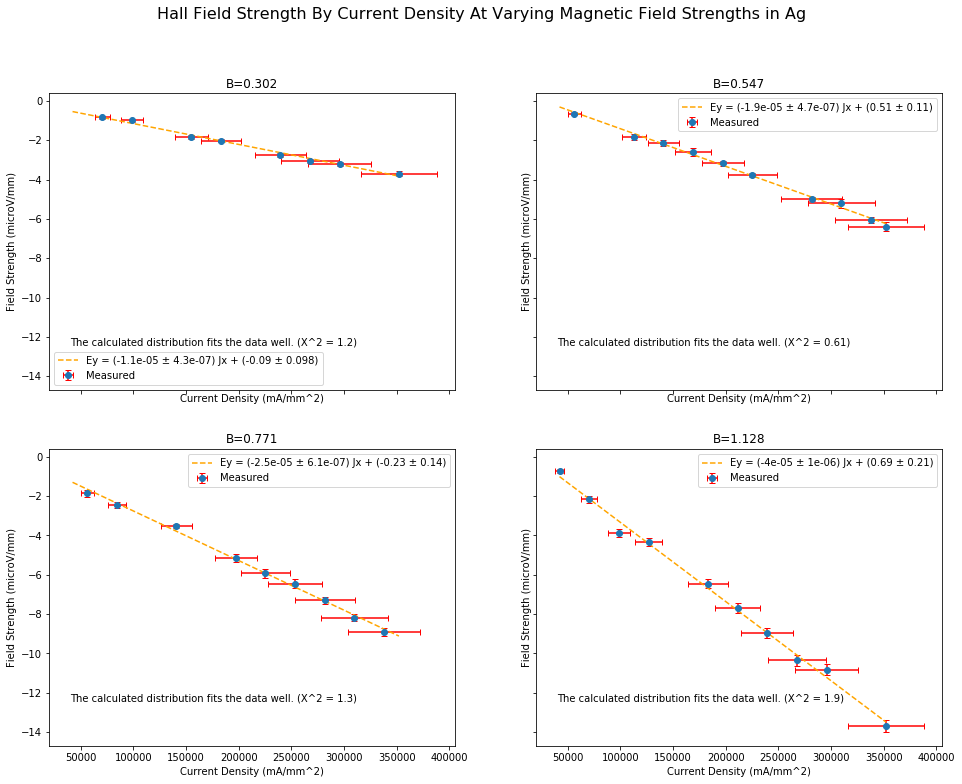

In [7]:
from numpy import linspace
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)

fig.set_size_inches(16, 12)
fig.suptitle('Hall Field Strength By Current Density At Varying Magnetic Field Strengths in Ag', fontsize=16)

for ix, (field_str, data) in enumerate(df.groupby('B (T)')):
    ax = axs[ix//2][ix%2]
    ax.errorbar(
        data['Jx'],
        data['Ey'], 
        xerr=data['dJx'],
        yerr=data['dEy'],
        capsize=3, 
        ecolor='r', 
        linestyle="None", 
        marker='o'
    )
    
    xs = linspace(df['Jx'].min(), df['Jx'].max(), 3)
    m = linregs.loc[field_str]['Slope']
    b = linregs.loc[field_str]['Intercept']
    s_m = linregs.loc[field_str]['Slope Uncertainty']
    s_b = linregs.loc[field_str]['Intercept Uncertainty']
    p =  linregs.loc[field_str]['P Value']
    chi =  linregs.loc[field_str]['Chi Squared Statistic']

    ax.plot(xs, m * xs + b, color='orange', linestyle='--')

    ax.set_xlabel("Current Density (mA/mm^2)")
    ax.set_ylabel("Field Strength (microV/mm)")
    ax.set_title("B={:0.4g}".format(field_str))
    ax.legend(["Ey = ({:0.2g} ± {:0.2g}) Jx + ({:0.2g} ± {:0.2g})".format(m, s_m, b, s_b), "Measured"])
    ax.annotate(
        (f"The calculated distribution does not fit the data. (X^2 = {chi:0.2g})" if p < 0.05 else f"The calculated distribution fits the data well. (X^2 = {chi:0.2g})"),
        (0.05, 0.15), 
        xycoords='axes fraction'
    )

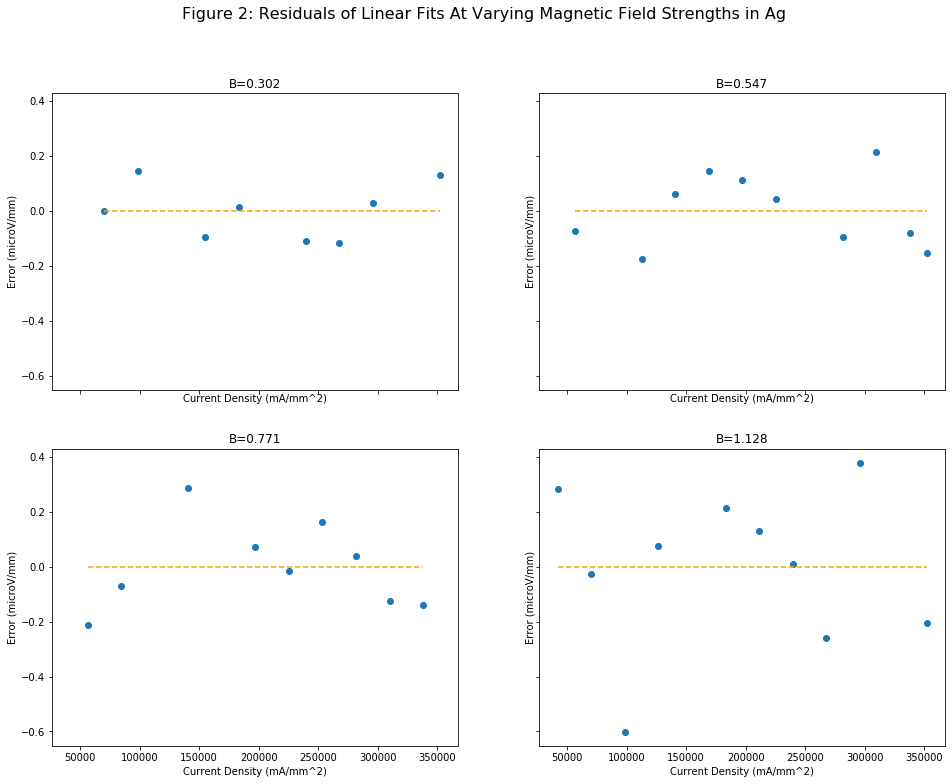

In [8]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True)

fig.set_size_inches(16, 12)
fig.suptitle('Residuals of Linear Fits At Varying Magnetic Field Strengths in Ag', fontsize=16)

for ix, (field_str, data) in enumerate(df.groupby('B (T)')):
    ax = axs[ix//2][ix%2]
    m = linregs.loc[field_str]['Slope']
    b = linregs.loc[field_str]['Intercept']

    residuals = data['Ey'] - (m * data['Jx'] + b)
    ax.plot(
        data['Jx'], 
        residuals, 
        linestyle='None',
        marker='o'
    )

    ax.set_xlabel("Current Density (mA/mm^2)")
    ax.set_ylabel("Error (microV/mm)")
    ax.set_title("B={:0.4g}".format(field_str))
    ax.plot(
        [data['Jx'].min(), data['Jx'].max()] , 
        [0, 0] , 
        color='orange', 
        linestyle='--'
    )


In [9]:
linregs

,Slope,Slope Uncertainty,Intercept,Intercept Uncertainty,Chi Squared Statistic,P Value
B (T),,,,,,
0.302,-0.000011,4.295824e-07,-0.089653,0.097565,1.177749,0.977970
0.547,-0.000019,4.699044e-07,0.505815,0.111952,0.612946,0.999712
0.771,-0.000025,6.054072e-07,-0.230417,0.138901,1.291168,0.988674
1.128,-0.000040,1.005503e-06,0.694616,0.213571,1.936877,0.982886


In [10]:
# Ey = (Rh * B) * Jx
# This implies we expect our b to be 0 and Rh = m/B

linregs['Rh'] = linregs['Slope'] / linregs.index # A dirty hack because B (T) is the index of the linear regressions dataframe
linregs['dRh'] = linregs['Rh'] * (
    (linregs['Slope Uncertainty']/linregs['Slope']) ** 2 +
    (0.003 / (linregs.index)) ** 2 # Hardcoded field uncertainty.
) ** 0.5

# The units for Rh are 10^-6 m^3/C
linregs

,Slope,Slope Uncertainty,Intercept,Intercept Uncertainty,Chi Squared Statistic,P Value,Rh,dRh
B (T),,,,,,,,
0.302,-0.000011,4.295824e-07,-0.089653,0.097565,1.177749,0.977970,-0.000035,-1.464530e-06
0.547,-0.000019,4.699044e-07,0.505815,0.111952,0.612946,0.999712,-0.000035,-8.802331e-07
0.771,-0.000025,6.054072e-07,-0.230417,0.138901,1.291168,0.988674,-0.000033,-7.954812e-07
1.128,-0.000040,1.005503e-06,0.694616,0.213571,1.936877,0.982886,-0.000036,-8.964448e-07


In [11]:
RH = linregs['Rh'].mean()
dRH = sum(linregs['dRh'] ** 2) ** 0.5 / len(linregs['Rh']) 
print("RH = {:0.2g} +- {:0.2g} 10^-6 m^3 / C".format(RH, dRH))

RH = -3.5e-05 +- 5.2e-07 10^-6 m^3 / C


In [12]:
# Calculate the resistance 
resistances = pd.Series([2.382, 2.358, 2.360], name='R')
r = resistances.mean()
dr = resistances.sem()

# Length mm
length = 2.29
length_uncertainty = 0.02

# Area mm^2
area = width * thickness 
area_pct_uncertainty = (thickness_pct_uncertainty ** 2 + width_pct_uncertainty ** 2) ** 0.5

# Resistivty Ohm mm 
rho = r * area / length
drho = (area_pct_uncertainty ** 2 + (length_uncertainty/length) ** 2 + (dr/r) ** 2) ** 0.5 * rho

print("R = {} +- {} ohm".format(r, dr))
print("length = {} +- {} mm".format(length, length_uncertainty))
print("area = {} +- {}% mm^2".format(area, area_pct_uncertainty))
print("rho = {:0.2g} +- {:0.2g} ohm mm".format(rho, drho))

R = 2.3666666666666667 +- 0.007688375063113903 ohm
length = 2.29 +- 0.02 mm
area = 7.099657655055508e-05 +- 0.10179112726653605% mm^2
rho = 7.3e-05 +- 7.5e-06 ohm mm


In [13]:
# n = 1 / (RH e)
e = - 1.6 * 10 ** -19 # Coulombs

n = 1 / (RH * e) * 10 ** -6 # m^-3
dn = abs(dRH/RH * n)
print("n = {:0.2g} +- {:0.2g} m^-3".format(n, dn))

n = 1.8e+17 +- 2.7e+15 m^-3


In [14]:
# mu = RH/rho
mu = RH/rho / 1000 # m^2/(V s)
dmu = ((dRH/RH) ** 2 + (drho/rho) ** 2) ** 0.5 * rho
print("mu = {:0.2g} +- {:0.2g} m^2/(Vs)".format(mu, dmu))

mu = -0.00047 +- 7.6e-06 m^2/(Vs)
